# MLFlow for Kaggle I - Loan Approval Prediction

In this notebook we will use the Loan Approval dataset to demonstrate how to build a machine learning pipeline using the MLFlow library. We will use the following steps:

1. Data Collection
2. Data Preprocessing
3. Train, Test, Validation Split
4. Model Training
5. Model Evaluation
6. Model Tracking
7. Kaggle Submission
8. BONUS: Exercises

## 1. Data Collection

### Loan Approval Prediction

We are going to take the data form kaggle, so we need to install the kaggle library and download the data. Here is the link to the Loan Approval Prediction: https://www.kaggle.com/competitions/playground-series-s4e10/overview. In order to start this competition we need to **manually join the competition** to accept the terms and conditions.

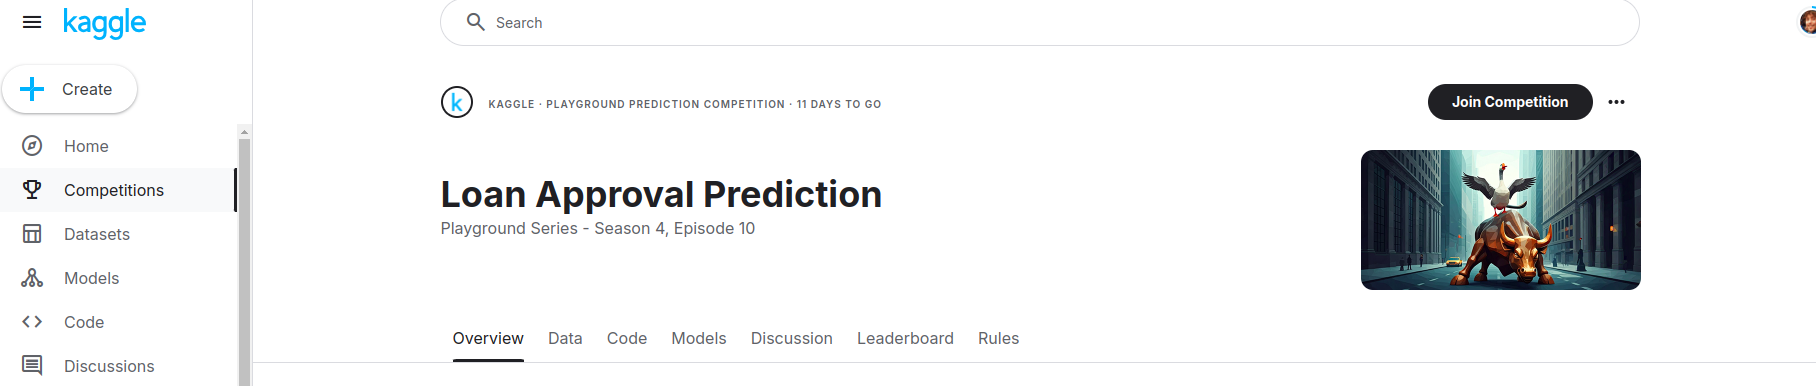

We then need to get an API TOKEN from kaggle. To do this we need to go to the kaggle website, click on the profile icon and then click on "My Account". In the "API" section we can click on "Create New API Token" to download the token. We then need to move the token to the `~/.kaggle` folder and rename it to `kaggle.json`.

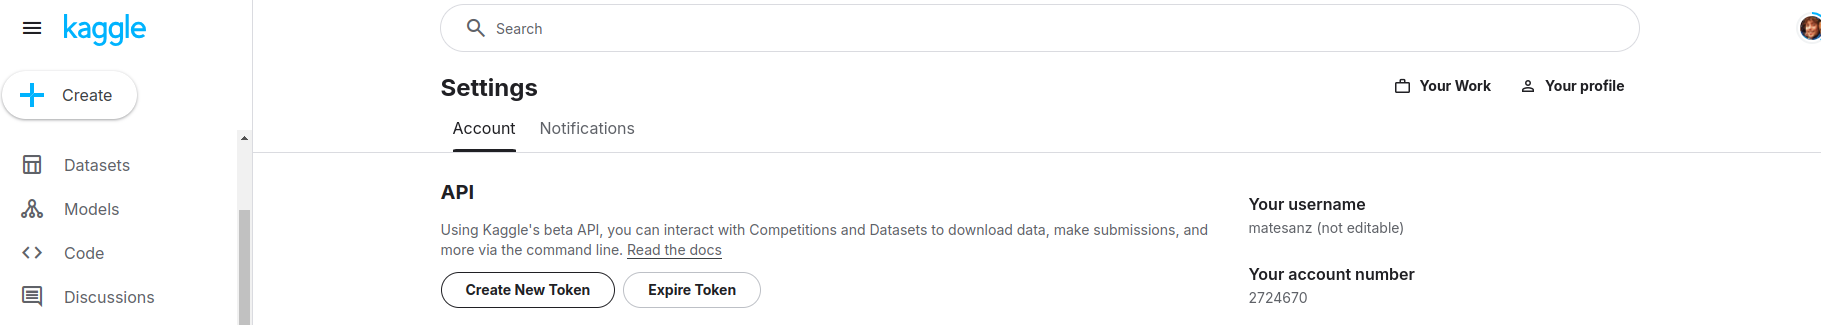

Once we've join the competition we can download the data using the following commands:

```bash
pip install kaggle
kaggle competitions download -c playground-series-s4e10
```

You also have the option to **download the data manually** by going to `Data` > `Download Data`

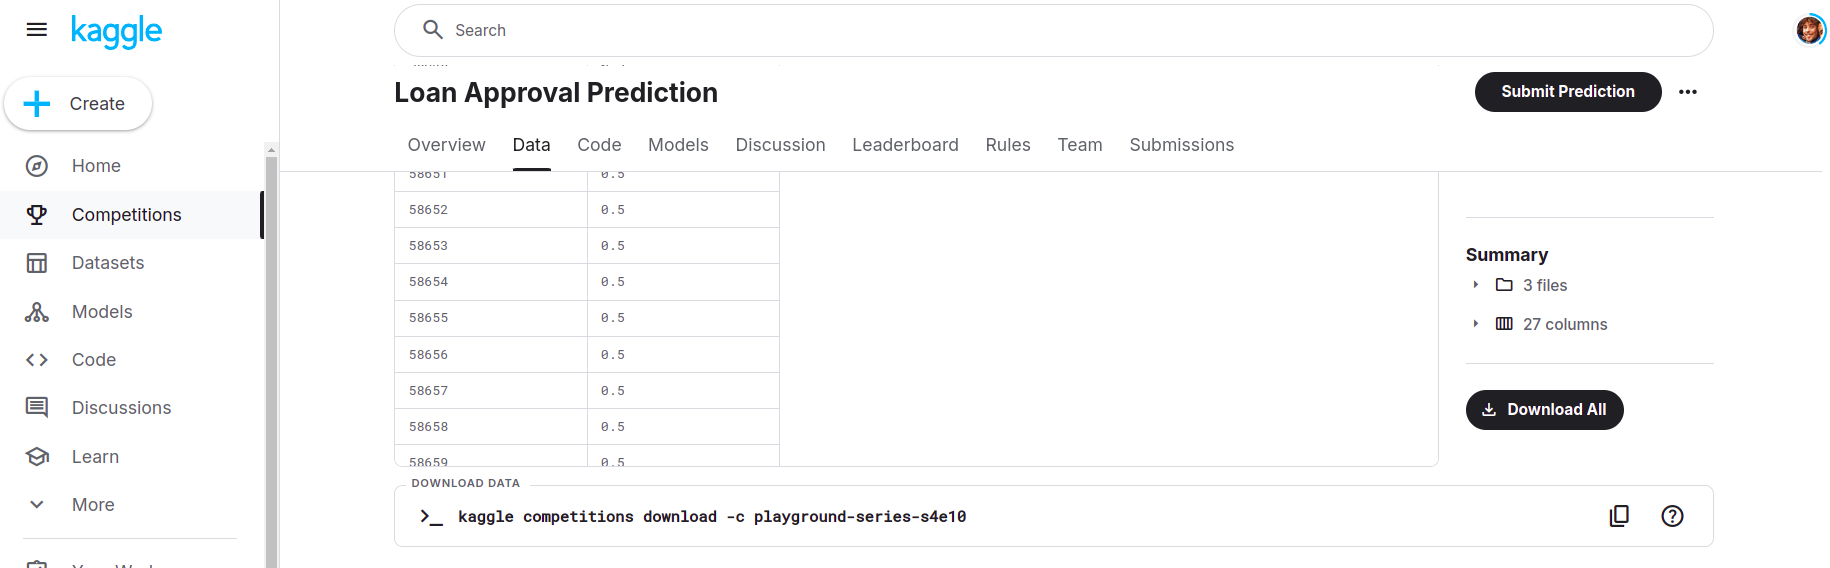

Once we've downloaded the data we are going to save it into `data/loan_prediciton`. We can see there are three files:

- `train.csv`: The training data
- `test.csv`: The test data
- `sample_submission.csv`: The sample submission file

ℹ️ Remember that `test.csv` does not have the target column, we will use it to evaluate our model against the kaggle platform.

### Explore the data

Let's load the data and take a look at the first few rows.

id  person_age  person_income person_home_ownership  \
train 0   0          37          35000                  RENT   
      1   1          22          56000                   OWN   
      2   2          29          28800                   OWN   
      3   3          30          70000                  RENT   
      4   4          22          60000                  RENT   

         person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  \
train 0                0.0   EDUCATION          B       6000          11.49   
      1                6.0     MEDICAL          C       4000          13.35   
      2                8.0    PERSONAL          A       6000           8.90   
      3               14.0     VENTURE          B      12000          11.11   
      4                2.0     MEDICAL          A       6000           6.92   

         loan_percent_income cb_person_default_on_file  \
train 0                 0.17                         N   
      1                 0.07                         N   
      2                 0.21                         N   
      3                 0.17                         N   
      4                 0.10                         N   

         cb_person_cred_hist_length  loan_status  
train 0                          14          0.0  
      1                           2          0.0  
      2                          10          0.0  
      3                           5          0.0  
      4                           3          0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

Missing values: id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64
Duplicated values: 0


## 2. Data Preprocessing

Remember that we need to preprocess the data before training the model. We will do the following steps:

### Encode Cateforical Variables


id  person_age  person_income  person_home_ownership  \
train 0   0          37          35000                      3   
      1   1          22          56000                      2   
      2   2          29          28800                      2   
      3   3          30          70000                      3   
      4   4          22          60000                      3   

         person_emp_length  loan_intent  loan_grade  loan_amnt  loan_int_rate  \
train 0                0.0            1           1       6000          11.49   
      1                6.0            3           2       4000          13.35   
      2                8.0            4           0       6000           8.90   
      3               14.0            5           1      12000          11.11   
      4                2.0            3           0       6000           6.92   

         loan_percent_income  cb_person_default_on_file  \
train 0                 0.17                          0   
      1                 0.07                          0   
      2                 0.21                          0   
      3                 0.17                          0   
      4                 0.10                          0   

         cb_person_cred_hist_length  loan_status  
train 0                          14          0.0  
      1                           2          0.0  
      2                          10          0.0  
      3                           5          0.0  
      4                           3          0.0

### Data Correlation

Let's take a look at the correlation between the features and the target variable

Text(0.5, 1.0, 'Correlation Heatmap')

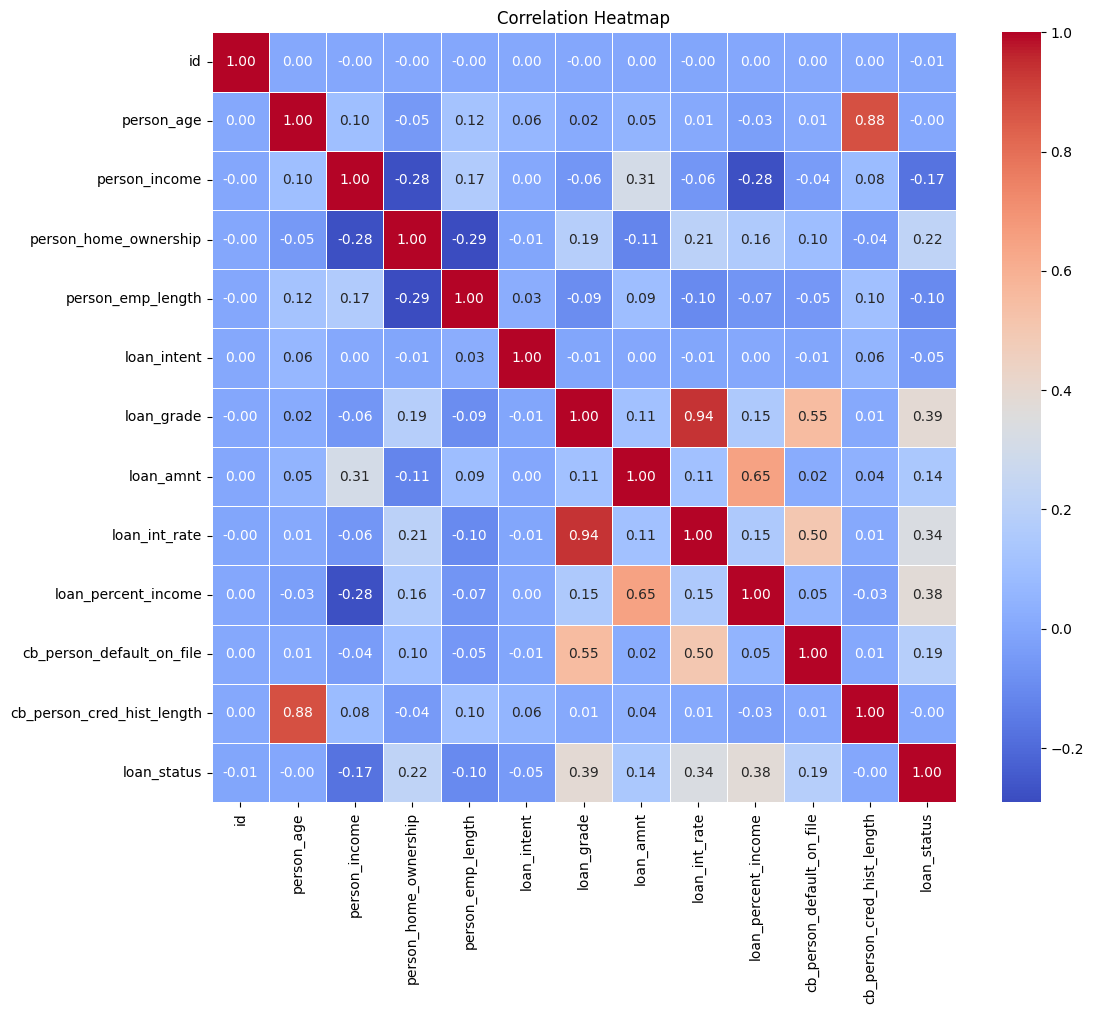

## 3. Train, Test, Validation split

We now split the the dataframe into training and validation sets. We will use the training set to train the model and the validation set to evaluate the model. Finally, we will use the test set to generate the predictions and send them to the kaggle platform.

## 4. Model Training

Once we have preprocessed the data we can train the model.

RandomForestClassifier(random_state=42)

## 5. Model Evaluation

This competition uses the **Area Under the Curve (AUC)** as the evaluation metric.

ROC AUC: 0.9347986903855718


### Generate submission file

Looking at the `submission_sample.csv` file we see that it hmut have two columns: `id` and `loan_status`. The `id` column must have the same values as the test set and the `loan_status` column must have the predictions.

,id,loan_status
0,58645,1.0
1,58646,0.0
2,58647,1.0
3,58648,0.0
4,58649,0.0


## 6. Model Tracking

Once we have trained the model we can use the MLFlow library to track the model performance. We can log the AUC, the metrics, the submission file...

### Connect to MLFlow

<Experiment: artifact_location='mlflow-artifacts:/461999357438845049', creation_time=1729443470096, experiment_id='461999357438845049', last_update_time=1729443470096, lifecycle_stage='active', name='Loan Prediction', tags={}>

### Submit to MLFlow

2024/10/22 15:00:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run industrious-doe-341 at: http://localhost:5000/#/experiments/461999357438845049/runs/7776305ffd064f84b1d1f00fbda239f2.
2024/10/22 15:00:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/461999357438845049.


## 7. Kaggle Submission

Finally we can submit the predictions to the kaggle platfrom. To do so we are going to retrieve the submission CSV from the best MLFlow run and submit it to the kaggle platform.

### Get the best run

In [24]:
runs = mlflow.search_runs(order_by=['metrics.auc DESC'])
best_run_id = runs.iloc[0]["run_id"]
best_run_name = runs.iloc[0]["tags.mlflow.runName"]
f"Best run: {best_run_name} (run_id: {best_run_id})"

'Best run: industrious-doe-341 (run_id: 7776305ffd064f84b1d1f00fbda239f2)'

### Download the submission file

In [13]:
from pathlib import Path
from mlflow import MlflowClient


client = MlflowClient()
submission_filename = Path(SUBMISSION_CSV_PATH).name
submision_csv_path = client.download_artifacts(best_run_id, submission_filename, DATA_PATH)

### Submit to Kaggle

You could upload the results manually by going to the kaggle website and clicking on `Submit Predictions`. You can then upload the file and submit it. Or you can use the kaggle API to submit the file:

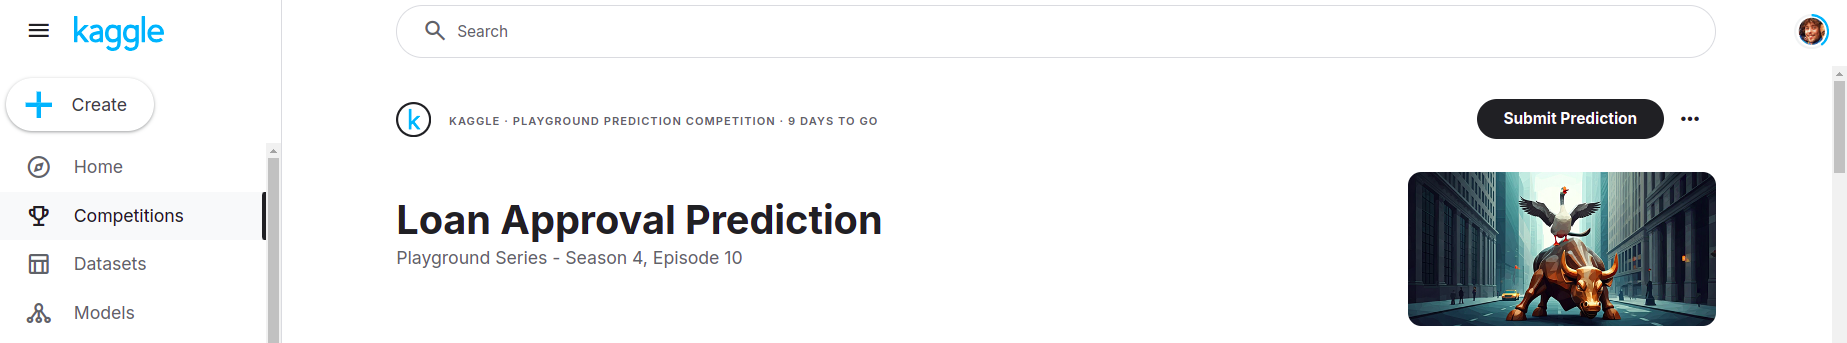

In [14]:
import kaggle


competition = "playground-series-s4e10"
message = f"Loan Prediction for run ID {best_run_name}"
kaggle.api.competition_submit(submision_csv_path, message, competition)

  0%|          | 0.00/382k [00:00<?, ?B/s]

100%|██████████| 382k/382k [00:00<00:00, 498kB/s]


Successfully submitted to Loan Approval Prediction

### 🎉 My Submission!:

## Bonus: Exercises

Now improve this notebook by doing the following exercises:

1. Log the Correlation Heatmap to MLflow

2. Model Tracking: log the model parameters to MLFlow

3. Model Training: try another model from the `sklearn` library log the results and compare them in MLFLow


4. Model Training: try another models from other libraries like `xgboost`, `lightgbm`, `catboost`... and compare the results


5. Model Evaluation: try another metrics (which metrics should we use for a classification problem?) and log them to MLFlow

6. Think about the train-test-validation split. How can we improve our model generalization? 


7. Model Evaluation: Think about the evaluation we are doing. Is it correct? How can we improve it?

8. Take a look into the [Kaggle Code Section](https://www.kaggle.com/competitions/playground-series-s4e10/code), did you find any interesting notebooks? Optional: Try to implement some of the ideas in this notebook.

9. Optional: Upload this notebook to the [Code Section of this Kaggle competition](https://www.kaggle.com/competitions/playground-series-s4e10/code) (show a picture of the notebook in the comments)